In [52]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

(336, 800)


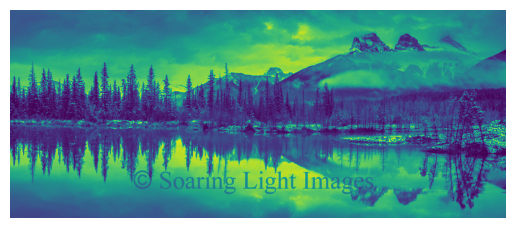

In [53]:
I = cv2.imread("sample3.jpg", 0)
plt.imshow(I);plt.axis("off")
print(I.shape)

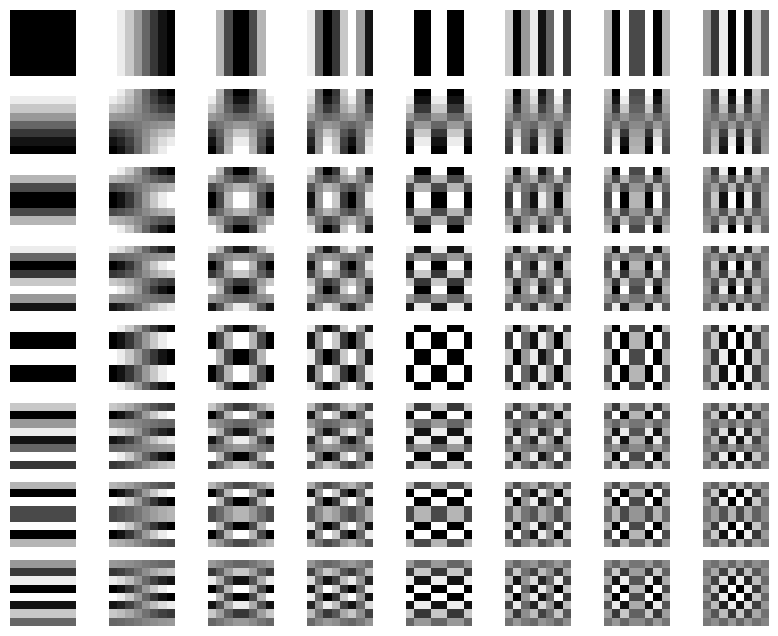

In [55]:
test = np.zeros((8, 8, 8, 8))
for u in range(8):
    for v in range(8):
        for x in range(8):
            for y in range(8):
                test[u, v, x, y] = np.cos(((2*x+1)*u*np.pi)/16) * np.cos(((2*y+1)*v*np.pi)/16)
fig, axes = plt.subplots(8, 8,figsize=(10, 8))
for u in range(8):
    for v in range(8):
        axes[u, v].imshow(test[u, v], cmap="gray")
        axes[u, v].axis("off")
plt.show()

In [ ]:
def QQC(degree):
    newQ = np.zeros((8, 8), dtype=np.uint8)
    if 1 < degree < 50 : 
        for i in range(8):
            for j in range(8):
                newQ[i, j] = np.clip((50/degree) * Q[i, j], 0, 255)
        return newQ
    elif 50 < degree < 100:
        for i in range(8):
            for j in range(8):
                newQ[i, j] = np.clip(((100 - degree)/50)*Q[i, j], 0, 255)
        return newQ
    elif degree == 50:return Q
    else :return "sorry but not possible"
Q = np.array([  [16, 11, 10, 16, 24, 40, 51, 61],
                [12, 12, 14, 19, 26, 58, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [18, 22, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]], dtype=np.uint8)
print(QQC(90))
print(QQC(50))
print(QQC(10))

In [69]:
num_blocks = (I.shape[0]//8, I.shape[1]//8)
blocks = np.empty((num_blocks[0], num_blocks[1], 8, 8))
for i in range(0, num_blocks[0], 8):
    for j in range(0, num_blocks[1], 8):
        blocks[i, j] = I[i:i+8, j:j+8]
blocks[0,0]

array([[-56., -56., -56., -56., -56., -56., -56., -55.],
       [-56., -56., -56., -56., -56., -56., -56., -56.],
       [-56., -57., -57., -57., -57., -57., -57., -57.],
       [-57., -57., -58., -58., -58., -57., -57., -57.],
       [-58., -58., -58., -58., -58., -57., -57., -56.],
       [-58., -58., -58., -58., -58., -57., -57., -57.],
       [-58., -58., -58., -59., -59., -58., -58., -57.],
       [-57., -58., -58., -59., -59., -59., -58., -58.]])

In [83]:
width, hieght, _, _ = blocks.shape
test2 = np.zeros_like(blocks)
g_x = blocks - 128
for u in range(width-1):
  au = 1
  if u == 0: au = 1/np.sqrt(2)
  for v in range(width-1):
    av = 1
    if v == 0: av = 1/np.sqrt(2)
    sumGx = 0
    for x in range(8):
        for y in range(8):
          for j in range(8):
              for k in range(8):
                sumGx = sumGx + g_x[u, v, j, k] * np.cos(((2*x+1)*u*np.pi)/16) * np.cos(((2*y+1)*v*np.pi)/16)
          test2[u, v, x, y] = (1/4)*au*av*sumGx

In [84]:
test2[0, 0]

array([[  -457.625,   -915.25 ,  -1372.875,  -1830.5  ,  -2288.125,
         -2745.75 ,  -3203.375,  -3661.   ],
       [ -4118.625,  -4576.25 ,  -5033.875,  -5491.5  ,  -5949.125,
         -6406.75 ,  -6864.375,  -7322.   ],
       [ -7779.625,  -8237.25 ,  -8694.875,  -9152.5  ,  -9610.125,
        -10067.75 , -10525.375, -10983.   ],
       [-11440.625, -11898.25 , -12355.875, -12813.5  , -13271.125,
        -13728.75 , -14186.375, -14644.   ],
       [-15101.625, -15559.25 , -16016.875, -16474.5  , -16932.125,
        -17389.75 , -17847.375, -18305.   ],
       [-18762.625, -19220.25 , -19677.875, -20135.5  , -20593.125,
        -21050.75 , -21508.375, -21966.   ],
       [-22423.625, -22881.25 , -23338.875, -23796.5  , -24254.125,
        -24711.75 , -25169.375, -25627.   ],
       [-26084.625, -26542.25 , -26999.875, -27457.5  , -27915.125,
        -28372.75 , -28830.375, -29288.   ]])

In [ ]:
width, hieght , _, _= test2.shape
final = np.zeros_like(test2)
for i in range(width):
    for j in range(hieght):
        for x in range(8):
            for y in range(8):
                final[i, j, x, y] = round(test2[i, j, x, y]/Q[x, y])

In [90]:
final[8, 2]

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])